## AQUA MOTIVATION

In [80]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
sns.set_style("whitegrid")
import matplotlib.ticker as mtick
import matplotlib
%matplotlib notebook
matplotlib.ticker._mathdefault = lambda x: '\\mathdefault{%s}'%x
#Get Non-Type-3 Fonts
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

legends = ["TRH=4K", "TRH=2K", "TRH=1K"]
                               
#Color Palette
colors = ['#FBD148','#3DB2FF','black', '#34a853']

#Set Font Size
#plt.rc('font', family='serif')
plt.rc('font', size='9.5')

# Read Dataframe
df = pd.read_csv("../stats_scripts/data/rrs_scalability.stat", delimiter='\s+')
#print (df)

# Format for Slowdown (%) ensure 0s stay 0s.
# for i in ['4K','2K','1K']:
#     slowdown_df = df.copy()
#     slowdown_df.loc[slowdown_df[i] == 0, i] = 1
#     slowdown_df[i] = slowdown_df[i]-1
# print (slowdown_df)

# Set position of bar on X axis
#barwidth
barWidth = 0.23
r1 = np.arange(len(df.index))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

#Create Plot
fig = plt.figure(figsize=(10,2.4))
ax = plt.gca()
#Bars
plt.bar(r1, df['4K'], width = barWidth, color=colors[0], label=legends[0],edgecolor='k')
plt.bar(r2, df['2K'], width = barWidth, color=colors[1],label=legends[1],edgecolor='k')
plt.bar(r3, df['1K'], width = barWidth, color=colors[2],label=legends[2],edgecolor='k')

#Y=1 Black Line
ax.plot([-0.75,len(df.index)+0.25], [1,1],lw=1.5,color='black')

# Add xticks on the middle of the group bars
df.at[34,'Expts'] = " "
plt.xticks([(r+barWidth*2) for r in range(len(df.index))], df['Expts'])
ax.set_xlim(-0.75,len(df.index)+0.25)
plt.xticks(rotation = 30,ha='right')

ax.tick_params(axis='x', which='major', labelsize=8)
for tick in ax.xaxis.get_major_ticks():
    tick_str = tick.label1.get_text()
    if( (tick_str == "Spec-18") or (tick_str == "Mix-16") or (tick_str == "Gmean-34")):
        tick.label1.set_weight('bold')


#Add Y-axes labels
plt.ylabel('Norm. Performance', size=9.5)
ax.tick_params(axis='y', which='major', labelsize=8.5)

#Set Y format & limts
#ax.yaxis.set_major_formatter(mtick.PercentFormatter(1,0))
ax.set_ylim(0,1.1)
ax.set_yticks([0.2,0.4,0.6,0.8,1])

#grid
ax.axis('on')
ax.xaxis.grid()

#Legend
leg_handles=[]
for i in range(0,3):
    leg_handles.append(mpatches.Patch(facecolor=colors[i], lw=1, label=legends[i], edgecolor='k'))
plt.legend(handles = leg_handles, bbox_to_anchor=(0.5,1.1),frameon=False,loc='center',ncol=4,prop={'size':10})

#Text
#ax.text(35,1.1, 'Gmean', family='serif',size='9.5',weight='bold',
#        ha='center', va='center')


#Figure
plt.tight_layout()
fig.savefig("rrs_scalability.pdf",bbox_inches='tight')
plt.show()


<IPython.core.display.Javascript object>

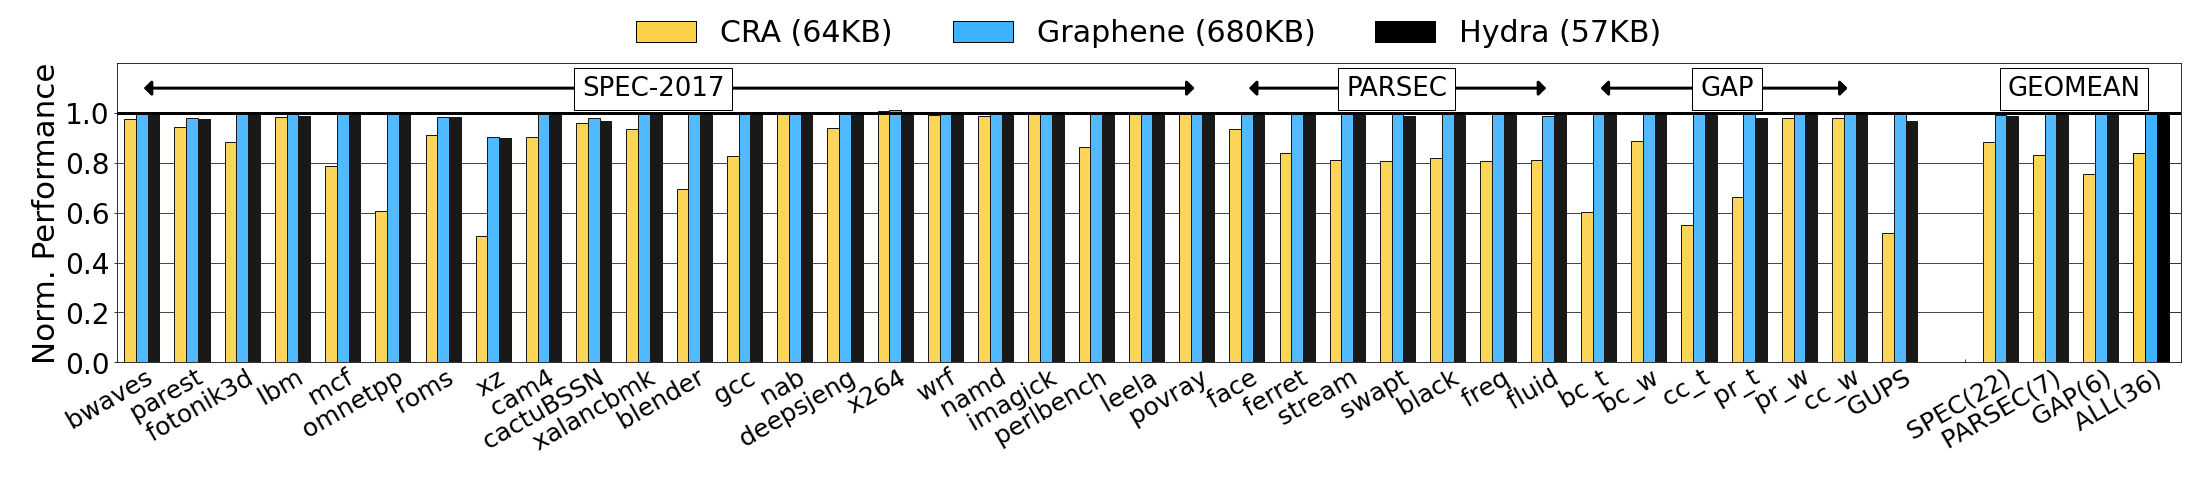

In [3]:
##Fig-5: Performance

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import csv
import numpy as np
import sys
import matplotlib.patches as mpatches
import pandas as pd

hatches = ["", "", "", ""]
colors = ['lightyellow','skyblue','darkred', '#34a853']
colors = ['#FBD148','#3DB2FF','darkred', '#34a853']
colors = ['#FBD148','#3DB2FF','black', '#34a853']
legends = ["CRA (64KB)", "Graphene (680KB)", "Hydra (57KB)"]

bench=[]
qarma=[[]]

leg_handles=[]
for i in range(0,3):
    leg_handles.append(mpatches.Patch(facecolor=colors[i], lw=1, hatch=hatches[i], label=legends[i], edgecolor='k'))

with open("./1B-perf.csv",'r') as csvfile:
    i=0
    df = pd.read_csv(csvfile)
    plots = df.T
    for index, row in plots.iterrows():
        if i == 0:
            j=0
            for col in row:
                # if j == 0:
                #     j=j+1
                #     continue;
                import re

                s = col
                result = re.search('[0-9]\.(.*)_', s)
                if result is not None:
                    bench.append(result.group(1))
                else:
                    bench.append(col)
            i=i+1
            continue
        qarma.append([])
        j=0
        for col in row:
            # if j == 0:
            #     j=j+1
            #     continue
            qarma[i-1].append(float(row[j]))
            j=j+1
        i=i+1

def subcategorybar(X, vals, width=0.7):
    n = len(vals)
    _X = np.arange(len(X))
    for i in range(n):
        #b = str(i)
        #a = 'core ' + b
        plt.axhline(1, color='black',linewidth=3)
        plt.bar(_X - width/2. + i/float(n)*width, vals[i], edgecolor='k',color=colors[i], 
               width=width/float(n), linewidth=1, hatch=hatches[i], align="edge",label=legends[i])           
    plt.xticks(_X+0.3, X)
    axes = plt.gca()
    axes.tick_params(axis="x",direction="in")
    axes.yaxis.grid(True,color='k')
    axes.set_axisbelow(True)
    plt.xticks(fontsize=25, rotation=30, ha='right')
    loc, labels = plt.xticks()
    yarr = np.arange(0, 1.1, step=0.2)
    ylabels = ["%0.1f" % x for x in yarr]
    plt.yticks(yarr, ylabels, fontsize=28)
    
    #Arrows
    plt.annotate(text='', xy=(0,1.1),  xytext=(21,1.1), arrowprops=dict(facecolor='black', lw=3, arrowstyle='<|-|>, head_width=0.6, head_length=0.6'))    
    plt.annotate(text='', xy=(22,1.1), xytext=(28,1.1), arrowprops=dict(facecolor='black', lw=3, arrowstyle='<|-|>, head_width=0.6, head_length=0.6'))    
    plt.annotate(text='', xy=(29,1.1), xytext=(34,1.1), arrowprops=dict(facecolor='black', lw=3, arrowstyle='<|-|>, head_width=0.6, head_length=0.6'))    
#     plt.annotate(s='', xy=(36.5,1.125), xytext=(40.5,1.125), arrowprops=dict(facecolor='black', lw=3, arrowstyle='<|-|>, head_width=0.6, head_length=0.6'))    
    #Labels
    axes.annotate('SPEC-2017', xy=(0.2, 1.3), xytext=(0.26, 0.87), xycoords='axes fraction', 
                fontsize=26, ha='center', va='bottom',
                bbox=dict(boxstyle='square', fc='white'))
    axes.annotate('PARSEC', xy=(0.64, 1.3), xytext=(0.62, 0.87), xycoords='axes fraction', 
                fontsize=26, ha='center', va='bottom',
                bbox=dict(boxstyle='square', fc='white'))
    axes.annotate('GAP', xy=(0.8, 1.3), xytext=(0.78, 0.87), xycoords='axes fraction', 
                fontsize=26, ha='center', va='bottom',
                bbox=dict(boxstyle='square', fc='white'))
    axes.annotate('GEOMEAN', xy=(0.948, 1.3), xytext=(0.948, 0.87), xycoords='axes fraction', 
                fontsize=26, ha='center', va='bottom',
                bbox=dict(boxstyle='square', fc='white'))    
    
    axes.fill_between(np.arange(-1,22, step=0.5), np.full(46, 121), facecolor='white', alpha=0.1)
    axes.fill_between(np.arange(21.5,29, step=0.5), np.full(15, 121), facecolor='white', alpha=0.1)
    axes.fill_between(np.arange(28.5,35, step=0.5), np.full(13, 121), facecolor='white', alpha=0.1)
    axes.fill_between(np.arange(34.5,36, step=0.5), np.full(3, 121), facecolor='white', alpha=0.1)
    axes.fill_between(np.arange(35.5,40, step=0.5), np.full(9, 121), facecolor='white', alpha=0.1)    

    plt.xlim([-0.5,40.6])
    plt.ylim([0.0,1.2])
    plt.ylabel("Norm. Performance",fontsize=31)
    plt.axhline(y=1.0,label="Baseline", color='black', linestyle='--')

# colors = ['lightyellow','skyblue','darkred', '#34a853']
fig = plt.figure(figsize=(37,5.5))
subcategorybar(bench, qarma[0:3])
plt.legend(handles = leg_handles, bbox_to_anchor=(0.5,1.1),frameon=False,loc='center',ncol=4,prop={'size':30})
plt.savefig('1B-perf.pdf',bbox_inches='tight')
plt.show()

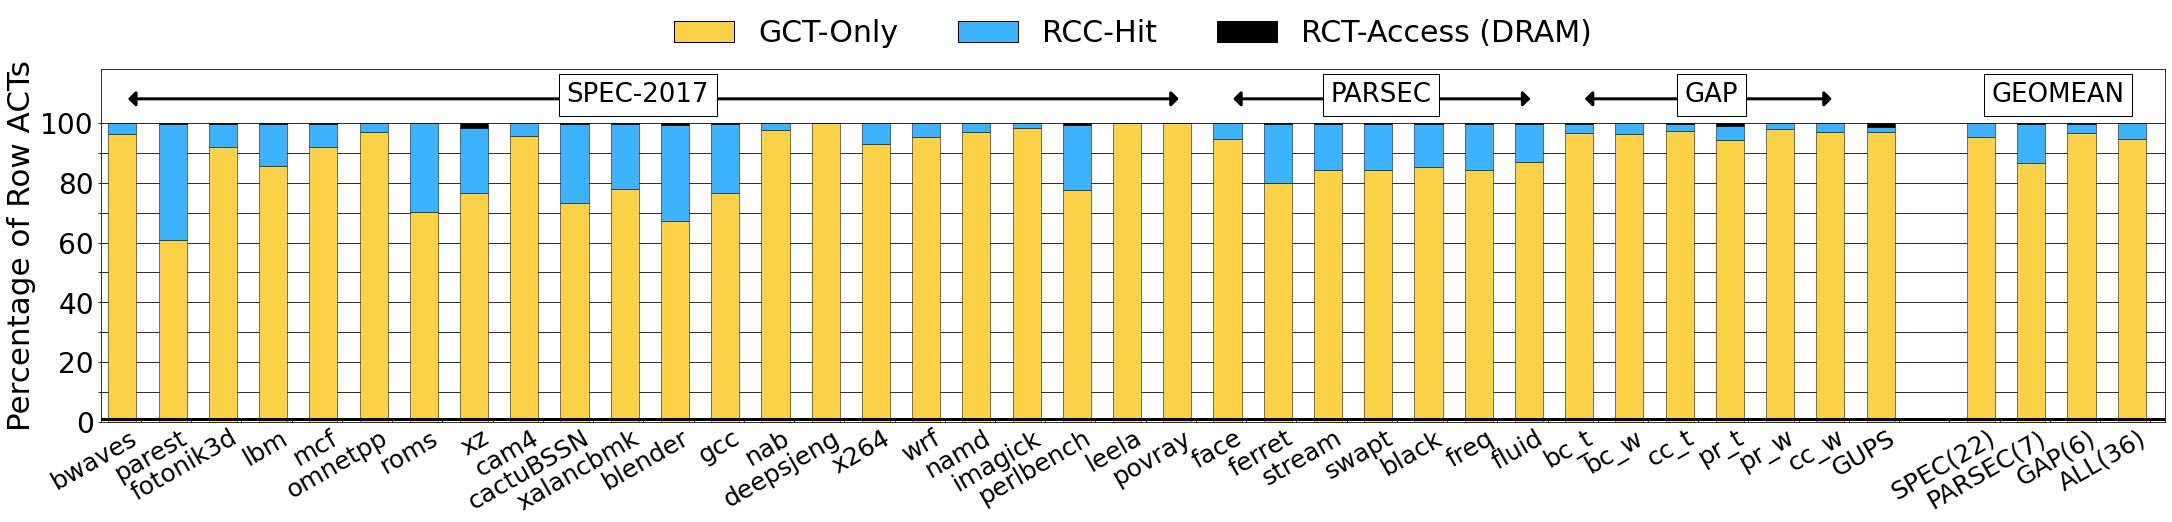

In [37]:
##Fig-5: Distribution

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import csv
import numpy as np
import sys
import matplotlib.patches as mpatches

hatches = ["", "", "", ""]
colors = ['#34a853','skyblue','darkred', '#34a853']
# colors = ['skyblue','darkred', '#34a853','green']
colors = ['#FBD148','#3DB2FF','black', '#34a853']
legends = ["GCT-Only", "RCC-Hit", "RCT-Access (DRAM)"]

bench=[]
qarma=[[]]

leg_handles=[]
for i in range(0,3):
    leg_handles.append(mpatches.Patch(facecolor=colors[i], lw=1, hatch=hatches[i], label=legends[i], edgecolor='k'))

with open("./1B-dist_hydra.csv",'r') as csvfile:
    plots = csv.reader(csvfile, delimiter=',')
    i=0
    for row in plots:
        if i == 0:
            j=0
            for col in row:
                if j == 0:
                    j=j+1
                    continue;
                import re

                s = col
                result = re.search('[0-9]\.(.*)_', s)
                if result is not None:
                    bench.append(result.group(1))
                else:
                    bench.append(col)
            i=i+1
            continue
        qarma.append([])
        j=0
        for col in row:
            if j == 0:
                j=j+1
                continue
            qarma[i-1].append(float(row[j]))
            j=j+1
        i=i+1

def subcategorybar(X, vals, width=0.7):
    n = len(vals)
    n=1
    _X = np.arange(len(X))
    for i in range(n):
        b = str(i)
        a = 'core ' + b
        plt.axhline(1, color='black',linewidth=3)
#         plt.bar(_X - width/2. + i/float(n)*width, vals[i], edgecolor='k',color=colors[i], 
#                width=width/float(n), linewidth=1, hatch=hatches[i], align="edge",label=legends[i])
#     plt.bar(_X - width/2, vals[0], edgecolor='k',color=colors[0], 
#                width=width/float(n), linewidth=1, hatch=hatches[0], align="edge",label=legends[0])
#     plt.bar(_X - width/2, vals[1], bottom=vals[1]+vals[0], edgecolor='k',color=colors[1], 
#                width=width/float(n), linewidth=1, hatch=hatches[1], align="edge",label=legends[1])
#     plt.bar(_X - width/2, vals[2],bottom=vals[2]+vals[1]+vals[0], edgecolor='k',color=colors[2], 
#                width=width/float(n), linewidth=1, hatch=hatches[2], align="edge",label=legends[2])
    n=1.25
    plt.bar(_X- width/2, vals[0],                 edgecolor='k',color=colors[0], width=width/float(n), linewidth=0.5, align="edge",label=legends[0])   
    plt.bar(_X  - width/2, vals[1], bottom=vals[0], edgecolor='k',color=colors[1], width=width/float(n), linewidth=0.5, align="edge",label=legends[1])   
    for i in range(len(vals[1])):
        vals[1][i] = vals[1][i] + vals[0][i]
    plt.bar(_X  - width/2, vals[2], bottom=vals[1], edgecolor='k',color=colors[2], width=width/float(n), linewidth=0.5, align="edge",label=legends[2]) 
    plt.xticks(_X+0.3, X)
    axes = plt.gca()
    axes.tick_params(axis="x",direction="in")
    axes.yaxis.grid(True,color='k')
    axes.set_axisbelow(True)
    plt.xticks(fontsize=25, rotation=30, ha='right')
    loc, labels = plt.xticks()
    yarr = np.arange(0, 102, step=10)
#     ylabels = ["%0.0f" % x for x in yarr]
    ylabels = [("%0.0f" % x) if (x%20==0) else "" for x in yarr]
    plt.yticks(yarr, ylabels, fontsize=28)
    
    #Arrows
    annX=108
    plt.annotate(text='', xy=(0,annX), xytext=(21,annX), arrowprops=dict(facecolor='black', lw=3, arrowstyle='<|-|>, head_width=0.6, head_length=0.6'))    
    plt.annotate(text='', xy=(22,annX), xytext=(28,annX), arrowprops=dict(facecolor='black', lw=3, arrowstyle='<|-|>, head_width=0.6, head_length=0.6'))    
    plt.annotate(text='', xy=(29,annX), xytext=(34,annX), arrowprops=dict(facecolor='black', lw=3, arrowstyle='<|-|>, head_width=0.6, head_length=0.6'))    
#     plt.annotate(s='', xy=(36.5,annX), xytext=(40.5,annX), arrowprops=dict(facecolor='black', lw=3, arrowstyle='<|-|>, head_width=0.6, head_length=0.6'))    
    #Labels
    axes.annotate('SPEC-2017', xy=(0.2, 1.3), xytext=(0.26, 0.89), xycoords='axes fraction', 
                fontsize=26, ha='center', va='bottom',
                bbox=dict(boxstyle='square', fc='white'))
    axes.annotate('PARSEC', xy=(0.64, 1.3), xytext=(0.62, 0.89), xycoords='axes fraction', 
                fontsize=26, ha='center', va='bottom',
                bbox=dict(boxstyle='square', fc='white'))
    axes.annotate('GAP', xy=(0.8, 1.3), xytext=(0.78, 0.89), xycoords='axes fraction', 
                fontsize=26, ha='center', va='bottom',
                bbox=dict(boxstyle='square', fc='white'))
    axes.annotate('GEOMEAN', xy=(0.948, 1.3), xytext=(0.948, 0.89), xycoords='axes fraction', 
                fontsize=26, ha='center', va='bottom',
                bbox=dict(boxstyle='square', fc='white'))  
    plt.xlim([-0.5,40.6])
    plt.ylim([0.0,118])
    plt.ylabel("Percentage of Row ACTs",fontsize=31)
    plt.axhline(y=1.0,label="Baseline", color='black', linestyle='--')

fig = plt.figure(figsize=(37,6.5))
subcategorybar(bench, qarma[0:3])
plt.legend(handles = leg_handles, bbox_to_anchor=(0.5,1.1),frameon=False,loc='center',ncol=4,prop={'size':30})
plt.savefig('1B-dist.pdf',bbox_inches='tight')
plt.show()

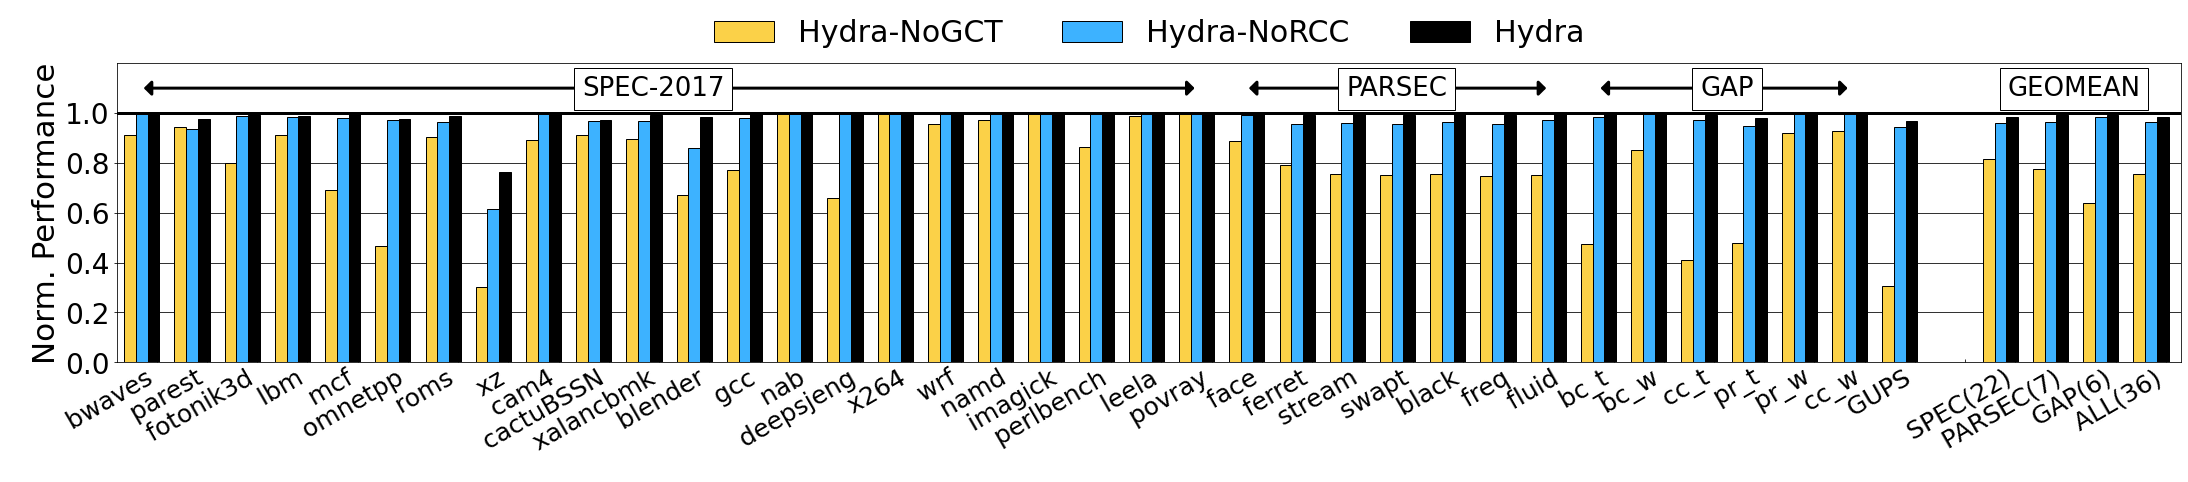

In [4]:
##Fig-5: NOCC-NOSRAMF

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import csv
import numpy as np
import sys
import matplotlib.patches as mpatches
import pandas as pd
hatches = ["", "", "", ""]
colors = ['lightyellow','skyblue','darkred', '#34a853']
colors = ['#FBD148','#3DB2FF','black', '#34a853']
legends = ["Hydra-NoGCT","Hydra-NoRCC","Hydra"]

bench=[]
qarma=[[]]

leg_handles=[]
for i in range(0,3):
    leg_handles.append(mpatches.Patch(facecolor=colors[i], lw=1, hatch=hatches[i], label=legends[i], edgecolor='k'))

with open("./1B-nocc2.csv",'r') as csvfile:
    i=0
    df = pd.read_csv(csvfile)
    plots = df.T
    for index, row in plots.iterrows():
        if i == 0:
            j=0
            for col in row:
                # if j == 0:
                #     j=j+1
                #     continue;
                import re

                s = col
                result = re.search('[0-9]\.(.*)_', s)
                if result is not None:
                    bench.append(result.group(1))
                else:
                    bench.append(col)
            i=i+1
            continue
        qarma.append([])
        j=0
        for col in row:
            # if j == 0:
            #     j=j+1
            #     continue
            qarma[i-1].append(float(row[j]))
            j=j+1
        i=i+1

def subcategorybar(X, vals, width=0.7):
    n = len(vals)
    _X = np.arange(len(X))
    for i in range(n):
        b = str(i)
        a = 'core ' + b
        plt.axhline(1, color='black',linewidth=3)
        plt.bar(_X - width/2. + i/float(n)*width, vals[i], edgecolor='k',color=colors[i], 
               width=width/float(n), linewidth=1, hatch=hatches[i], align="edge",label=legends[i])           
    plt.xticks(_X+0.3, X)
    axes = plt.gca()
    axes.tick_params(axis="x",direction="in")
    axes.yaxis.grid(True,color='k')
    axes.set_axisbelow(True)
    plt.xticks(fontsize=25, rotation=30, ha='right')
    loc, labels = plt.xticks()
    yarr = np.arange(0, 1.1, step=0.2)
    ylabels = ["%0.1f" % x for x in yarr]
    plt.yticks(yarr, ylabels, fontsize=28)
    
       #Arrows
    plt.annotate(text='', xy=(0,1.1),  xytext=(21,1.1), arrowprops=dict(facecolor='black', lw=3, arrowstyle='<|-|>, head_width=0.6, head_length=0.6'))    
    plt.annotate(text='', xy=(22,1.1), xytext=(28,1.1), arrowprops=dict(facecolor='black', lw=3, arrowstyle='<|-|>, head_width=0.6, head_length=0.6'))    
    plt.annotate(text='', xy=(29,1.1), xytext=(34,1.1), arrowprops=dict(facecolor='black', lw=3, arrowstyle='<|-|>, head_width=0.6, head_length=0.6'))    
#     plt.annotate(s='', xy=(36.5,1.125), xytext=(40.5,1.125), arrowprops=dict(facecolor='black', lw=3, arrowstyle='<|-|>, head_width=0.6, head_length=0.6'))    
    #Labels
    axes.annotate('SPEC-2017', xy=(0.2, 1.3), xytext=(0.26, 0.87), xycoords='axes fraction', 
                fontsize=26, ha='center', va='bottom',
                bbox=dict(boxstyle='square', fc='white'))
    axes.annotate('PARSEC', xy=(0.64, 1.3), xytext=(0.62, 0.87), xycoords='axes fraction', 
                fontsize=26, ha='center', va='bottom',
                bbox=dict(boxstyle='square', fc='white'))
    axes.annotate('GAP', xy=(0.8, 1.3), xytext=(0.78, 0.87), xycoords='axes fraction', 
                fontsize=26, ha='center', va='bottom',
                bbox=dict(boxstyle='square', fc='white'))
    axes.annotate('GEOMEAN', xy=(0.948, 1.3), xytext=(0.948, 0.87), xycoords='axes fraction', 
                fontsize=26, ha='center', va='bottom',
                bbox=dict(boxstyle='square', fc='white'))   
    plt.xlim([-0.5,40.6])
    plt.ylim([0.0,1.2])
    plt.ylabel("Norm. Performance",fontsize=31)
    plt.axhline(y=1.0,label="Baseline", color='black', linestyle='--')

# colors = ['lightyellow','skyblue','darkred', '#34a853']
colors = ['#FBD148','#3DB2FF','black', '#34a853']
fig = plt.figure(figsize=(37,5.5))
subcategorybar(bench, qarma[0:3])
plt.legend(handles = leg_handles, bbox_to_anchor=(0.5,1.1),frameon=False,loc='center',ncol=4,prop={'size':30})
plt.savefig('1B-nocc2.pdf',bbox_inches='tight')
plt.show()

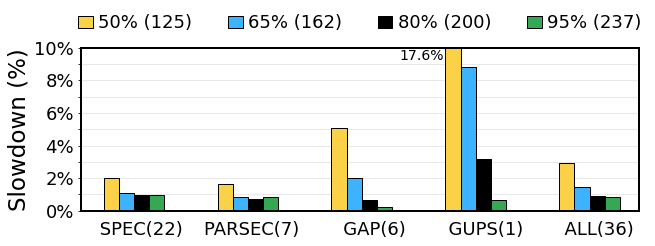

In [14]:
##Fig10: FTH sensitivity
import matplotlib.pyplot as plt
import csv
import numpy as np
import sys
import matplotlib.patches as mpatches
import seaborn as sns
import pandas as pd
# from plotting_lib import get_color_palette
hatches = ["", "", "", "",""]
# colors = ['#4285f4', '#ea4335', 'black', '#34a853']
# colors = ['#79A3B1','#1687A7','#276678']
#gist_rath_r
# colors = ['#bdab62', '#5da04b', '#153878','maroon','#151870']
colors = ['skyblue', '#5da04b', '#153878','maroon','#753188']
colors = ['#FBD148','#3DB2FF','black', '#34a853']
# colors = ['#0000ff','#c729d6','#ffa857']
# colors = ['#ffe817','#ff6996','#6400ff']
legends = ["50% (125)", "65% (162)","80% (200)","95% (237)"]
# legends = ["BR1", "BR2", "BR3","BR4"]
bench=[]
qarma=[[]]

leg_handles=[]
for i in range(0,4):
    leg_handles.append(mpatches.Patch(facecolor=colors[i], lw=1, hatch=hatches[i], label=legends[i], edgecolor='k'))

with open("1B-fth.csv",'r') as csvfile:
    i=0
    df = pd.read_csv(csvfile)
    plots = df.T
    # print(plots)
    for index, row in plots.iterrows():
        if i == 0:
            j=0
            for col in row:
                # if j == 0:
                #     j=j+1
                #     continue;
                import re

                s = col
                result = re.search('[0-9]\.(.*)_', s)
                if result is not None:
                    bench.append(result.group(1))
                else:
                    bench.append(col)
            i=i+1
            continue
        qarma.append([])
        j=0
        for col in row:
            # if j == 0:
            #     j=j+1
            #     continue
            qarma[i-1].append(float(row[j]))
            j=j+1
        i=i+1

def subcategorybar(X, vals, width=0.8):
    n = len(vals)
    n=6
    _X = np.arange(len(X))
    for i in range(4):
        b = str(i)
        a = 'core ' + b
#         print(vals[i])
        plt.bar(_X + i/float(n)*width, vals[i], edgecolor='k',color=colors[i], 
               width=width/float(n), linewidth=1, hatch=hatches[i], align="edge",label=legends[i])   
        # for index, value in enumerate(vals[i]):
        #     if (index >= 25):
        #         plt.text(index - width/2 + i/float(n)*width, 3*value, "{:.2f}%".format(value), fontsize=16, 
        #         bbox=dict(boxstyle='Round', fc='white'), rotation=30)
    plt.xticks(_X+0.2, X)
    axes = plt.gca()
    
    plt.text(2.6, 9.25,str(17.6)+"%", color = 'black',fontsize=14)
    # plt.text(2.45, 0.5,str(0.05)+"%", color = 'black',fontsize=14)
    axes.tick_params(axis="x",direction="in",pad=10)
    axes.yaxis.grid(True,color='lightgrey', linewidth=0.5)
#     axes.yaxis.grid(True,color='k',linewidth=0.2)
    axes.set_axisbelow(True)
    plt.xticks(fontsize=tick_font_s, rotation=0, ha='center')
    loc, labels = plt.xticks()
    yarr = np.arange(0, 101, step=1)
#     ylabels = ["%0.0f%%" % x for x in yarr]
    ylabels = [("%0.0f%%" % x) if (x%2==0) else "" for x in yarr]
    plt.yticks(yarr, ylabels, fontsize=tick_font_s)
#     axes.yaxis.set_label_position("right")
#     axes.yaxis.tick_right()
    plt.xlim([-0.2,4.7])
#     plt.xlim([-0.5,4.5])
    plt.ylim([-0.0,10])
    plt.ylabel("Slowdown (%)",fontsize=23)
    # plt.axhline(y=1.0,label="Baseline", color='black', linestyle='dotted',ms=12.0)
    for axis in ['top','bottom','left','right']:
        axes.spines[axis].set_linewidth(2)

fig = plt.figure(figsize=(10,3))
tick_font_s=18
subcategorybar(bench, qarma[0:4])
plt.legend(handles = leg_handles,handlelength=0.8,handletextpad=0.3, bbox_to_anchor=(0.5,1.15),frameon=False,loc='center',ncol=4,prop={'size':18})
# plt.show()
# plt.savefig('rth.pdf',bbox_inches='tight')
plt.savefig('1B-fth.pdf',bbox_inches='tight')
# fig.savefig('crax.pdf',dpi=fig.dpi)

[2.85, 2.219, 6.793, 20.013, 3.917]
[1.038, 0.644, 0.616, 3.058, 0.948]
[-0.118, 0.483, 0.015, 0.051, 0.026]


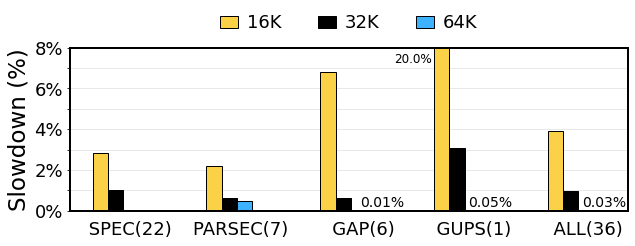

In [12]:
##Fig9: Filter Size sensitivity
import matplotlib.pyplot as plt
import csv
import numpy as np
import sys
import matplotlib.patches as mpatches
import seaborn as sns
import pandas as pd
# from plotting_lib import get_color_palette
hatches = ["", "", "", "",""]
# colors = ['#4285f4', '#ea4335', 'black', '#34a853']
# colors = ['#79A3B1','#1687A7','#276678']
#gist_rath_r
# colors = ['#F3950D', '#5da04b', '#153878','maroon','#151870']
colors = ['skyblue', '#5da04b', '#153878','maroon','#753188']
colors = ['#FBD148','black','#3DB2FF', '#34a853']

# colors = ['#0000ff','#c729d6','#ffa857']
# colors = ['#ffe817','#ff6996','#6400ff']
legends = ["16K", "32K","64K"]
# legends = ["BR1", "BR2", "BR3","BR4"]
bench=[]
qarma=[[]]

leg_handles=[]
for i in range(0,3):
    leg_handles.append(mpatches.Patch(facecolor=colors[i], lw=1, hatch=hatches[i], label=legends[i], edgecolor='k'))

with open("1B-filter.csv",'r') as csvfile:
    i=0
    df = pd.read_csv(csvfile)
    plots = df.T
    # print(plots)
    for index, row in plots.iterrows():
        if i == 0:
            j=0
            for col in row:
                # if j == 0:
                #     j=j+1
                #     continue;
                import re

                s = col
                result = re.search('[0-9]\.(.*)_', s)
                if result is not None:
                    bench.append(result.group(1))
                else:
                    bench.append(col)
            i=i+1
            continue
        qarma.append([])
        j=0
        for col in row:
            # if j == 0:
            #     j=j+1
            #     continue
            qarma[i-1].append(float(row[j]))
            j=j+1
        i=i+1

def subcategorybar(X, vals, width=0.8):
    n = len(vals)
    n=6
    _X = np.arange(len(X))
    for i in range(3):
        b = str(i)
        a = 'core ' + b
        print(vals[i])
        plt.bar(_X + i/float(n)*width, vals[i], edgecolor='k',color=colors[i], 
               width=width/float(n), linewidth=1, hatch=hatches[i], align="edge",label=legends[i])   
        # for index, value in enumerate(vals[i]):
        #     if (index >= 25):
        #         plt.text(index - width/2 + i/float(n)*width, 3*value, "{:.2f}%".format(value), fontsize=16, 
        #         bbox=dict(boxstyle='Round', fc='white'), rotation=30)
    plt.xticks(_X+0.2, X)
    axes = plt.gca()
    plt.text(2.65, 7.25,str(20.0)+"%", color = 'black',fontsize=12)
    plt.text(2.35, 0.2,"0.01%", color = 'black',fontsize=14)
    plt.text(4.3, 0.2,"0.03%", color = 'black',fontsize=14)
    # plt.text(1.45, 0.2,"0.01%", color = 'black',fontsize=14)
    plt.text(3.3, 0.2,"0.05%", color = 'black',fontsize=14)
    axes.tick_params(axis="x",direction="in",pad=10)
    axes.yaxis.grid(True,color='lightgrey', linewidth=0.5)
#     axes.yaxis.grid(True,color='k',linewidth=0.2)
    axes.set_axisbelow(True)
    plt.xticks(fontsize=tick_font_s, rotation=0, ha='center')
#     ax.tick_params(axis='x', which='major', pad=15)
    loc, labels = plt.xticks()
    yarr = np.arange(0, 101, step=1)
    # ylabels = ["%0.0f%%" % x for x in yarr]
    ylabels = [("%0.0f%%" % x) if (x%2==0) else "" for x in yarr]
    plt.yticks(yarr, ylabels, fontsize=tick_font_s)
#     plt.xlim([-0.5,4.2])
    plt.xlim([-0.2,4.7])
    plt.ylim([0,8])
    plt.ylabel("Slowdown (%)",fontsize=23)
    # plt.axhline(y=1.0,label="Baseline", color='black', linestyle='dotted',ms=12.0)
    for axis in ['top','bottom','left','right']:
        axes.spines[axis].set_linewidth(2)

fig = plt.figure(figsize=(10,3))
tick_font_s=18
subcategorybar(bench, qarma[0:3])
plt.legend(handles = leg_handles,handlelength=1,handletextpad=0.5, bbox_to_anchor=(0.5,1.15),frameon=False,loc='center',ncol=4,prop={'size':18})
# plt.savefig('rth.pdf',bbox_inches='tight')
plt.savefig('1B-filter.pdf',bbox_inches='tight')
plt.show()
# fig.savefig('crax.pdf',dpi=fig.dpi)

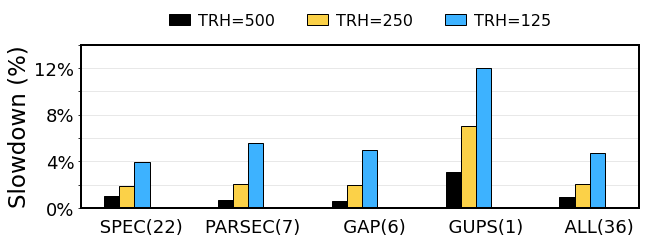

In [13]:
##Fig9: Proportional Struct Size sensitivity
import matplotlib.pyplot as plt
import csv
import numpy as np
import sys
import matplotlib.patches as mpatches
import seaborn as sns
import pandas as pd
# from plotting_lib import get_color_palette
hatches = ["", "", "", "",""]
# colors = ['#4285f4', '#ea4335', 'black', '#34a853']
# colors = ['#79A3B1','#1687A7','#276678']
#gist_rath_r
# colors = ['#F3950D', '#5da04b', '#153878','maroon','#151870']
colors = ['skyblue', '#5da04b', '#153878','maroon','#753188']
colors = ['black','#FBD148','#3DB2FF', '#34a853']

# colors = ['#0000ff','#c729d6','#ffa857']
# colors = ['#ffe817','#ff6996','#6400ff']
# legends = ["16K", "32K","64K","128K"]
legends = ["TRH=500","TRH=250","TRH=125"]
# legends = ["BR1", "BR2", "BR3","BR4"]
bench=[]
qarma=[[]]

leg_handles=[]
for i in range(0,3):
    leg_handles.append(mpatches.Patch(facecolor=colors[i], lw=1, hatch=hatches[i], label=legends[i], edgecolor='k'))

with open("1B-rth.csv",'r') as csvfile:
    i=0
    df = pd.read_csv(csvfile)
    plots = df.T
    for index, row in plots.iterrows():
        if i == 0:
            j=0
            for col in row:
                # if j == 0:
                #     j=j+1
                #     continue;
                import re

                s = col
                result = re.search('[0-9]\.(.*)_', s)
                if result is not None:
                    bench.append(result.group(1))
                else:
                    bench.append(col)
            i=i+1
            continue
        qarma.append([])
        j=0
        for col in row:
            # if j == 0:
            #     j=j+1
            #     continue
            qarma[i-1].append(float(row[j]))
            j=j+1
        i=i+1

def subcategorybar(X, vals, width=0.8):
    n = len(vals)
    n=6
    _X = np.arange(len(X))
    for i in range(3):
        b = str(i)
        a = 'core ' + b
        # print(vals[i])
        plt.bar(_X + i/float(n)*width, vals[i], edgecolor='k',color=colors[i], 
               width=width/float(n), linewidth=1, hatch=hatches[i], align="edge",label=legends[i])   
        # for index, value in enumerate(vals[i]):
        #     if (index >= 25):
        #         plt.text(index - width/2 + i/float(n)*width, 3*value, "{:.2f}%".format(value), fontsize=16, 
        #         bbox=dict(boxstyle='Round', fc='white'), rotation=30)
    plt.xticks(_X+0.2 , X)
    axes = plt.gca()
    axes.tick_params(axis="x",direction="in",pad=10)
    axes.yaxis.grid(True,color='lightgrey', linewidth=0.5)
#     axes.yaxis.grid(True,color='k',linewidth=0.2)
    axes.set_axisbelow(True)
    plt.xticks(fontsize=tick_font_s, rotation=0, ha='center')
#     ax.tick_params(axis='x', which='major', pad=15)
    loc, labels = plt.xticks()
    yarr = np.arange(0, 101, step=2)
#     ylabels = ["%0.0f%%" % x for x in yarr]
    ylabels = [("%0.0f%%" % x) if (x%4==0) else "" for x in yarr]
    plt.yticks(yarr, ylabels, fontsize=tick_font_s)
#     plt.xlim([-0.5,4.2])
    plt.xlim([-0.2,4.7])
    plt.ylim([0,14])
    plt.ylabel("Slowdown (%)",fontsize=23)
    # plt.axhline(y=1.0,label="Baseline", color='black', linestyle='dotted',ms=12.0)
    for axis in ['top','bottom','left','right']:
        axes.spines[axis].set_linewidth(2)

fig = plt.figure(figsize=(10,3))
tick_font_s=18
subcategorybar(bench, qarma[0:4])
plt.legend(handles = leg_handles,handlelength=1.3,handletextpad=0.5, bbox_to_anchor=(0.5,1.15),frameon=False,loc='center',ncol=4,prop={'size':16})
plt.savefig('1B-rth.pdf',bbox_inches='tight')
plt.show()

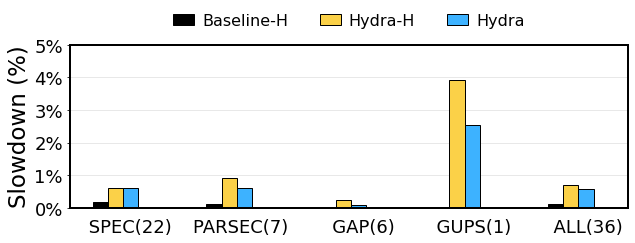

In [19]:
##Fig9: Proportional Struct Size sensitivity
import matplotlib.pyplot as plt
import csv
import numpy as np
import sys
import matplotlib.patches as mpatches
import seaborn as sns
import pandas as pd
# from plotting_lib import get_color_palette
hatches = ["", "", "", "",""]
# colors = ['#4285f4', '#ea4335', 'black', '#34a853']
# colors = ['#79A3B1','#1687A7','#276678']
#gist_rath_r
# colors = ['#F3950D', '#5da04b', '#153878','maroon','#151870']
colors = ['skyblue', '#5da04b', '#153878','maroon','#753188']
colors = ['black','#FBD148','#3DB2FF', '#34a853']

# colors = ['#0000ff','#c729d6','#ffa857']
# colors = ['#ffe817','#ff6996','#6400ff']
# legends = ["16K", "32K","64K","128K"]
legends = ["Baseline-H","Hydra-H","Hydra"]
# legends = ["BR1", "BR2", "BR3","BR4"]
bench=[]
qarma=[[]]

leg_handles=[]
for i in range(0,3):
    leg_handles.append(mpatches.Patch(facecolor=colors[i], lw=1, hatch=hatches[i], label=legends[i], edgecolor='k'))

with open("hashed-perf.csv",'r') as csvfile:
    i=0
    df = pd.read_csv(csvfile)
    plots = df.T
    for index, row in plots.iterrows():
        if i == 0:
            j=0
            for col in row:
                # if j == 0:
                #     j=j+1
                #     continue;
                import re

                s = col
                result = re.search('[0-9]\.(.*)_', s)
                if result is not None:
                    bench.append(result.group(1))
                else:
                    bench.append(col)
            i=i+1
            continue
        qarma.append([])
        j=0
        for col in row:
            # if j == 0:
            #     j=j+1
            #     continue
            qarma[i-1].append(float(row[j]))
            j=j+1
        i=i+1

def subcategorybar(X, vals, width=0.8):
    n = len(vals)
    n=6
    _X = np.arange(len(X))
    for i in range(3):
        b = str(i)
        a = 'core ' + b
        # print(vals[i])
        plt.bar(_X + i/float(n)*width, vals[i], edgecolor='k',color=colors[i], 
               width=width/float(n), linewidth=1, hatch=hatches[i], align="edge",label=legends[i])   
        # for index, value in enumerate(vals[i]):
        #     if (index >= 25):
        #         plt.text(index - width/2 + i/float(n)*width, 3*value, "{:.2f}%".format(value), fontsize=16, 
        #         bbox=dict(boxstyle='Round', fc='white'), rotation=30)
    plt.xticks(_X+0.2 , X)
    axes = plt.gca()
    axes.tick_params(axis="x",direction="in",pad=10)
    axes.yaxis.grid(True,color='lightgrey', linewidth=0.5)
#     axes.yaxis.grid(True,color='k',linewidth=0.2)
    axes.set_axisbelow(True)
    plt.xticks(fontsize=tick_font_s, rotation=0, ha='center')
#     ax.tick_params(axis='x', which='major', pad=15)
    loc, labels = plt.xticks()
    yarr = np.arange(0, 101, step=1)
#     ylabels = ["%0.0f%%" % x for x in yarr]
    ylabels = [("%0.0f%%" % x) if (x%1==0) else "" for x in yarr]
    plt.yticks(yarr, ylabels, fontsize=tick_font_s)
#     plt.xlim([-0.5,4.2])
    plt.xlim([-0.2,4.7])
    plt.ylim([0,5])
    plt.ylabel("Slowdown (%)",fontsize=23)
    # plt.axhline(y=1.0,label="Baseline", color='black', linestyle='dotted',ms=12.0)
    for axis in ['top','bottom','left','right']:
        axes.spines[axis].set_linewidth(2)

fig = plt.figure(figsize=(10,3))
tick_font_s=18
subcategorybar(bench, qarma[0:4])
plt.legend(handles = leg_handles,handlelength=1.3,handletextpad=0.5, bbox_to_anchor=(0.5,1.15),frameon=False,loc='center',ncol=4,prop={'size':16})
plt.savefig('hashed-perf.png',bbox_inches='tight')
plt.show()

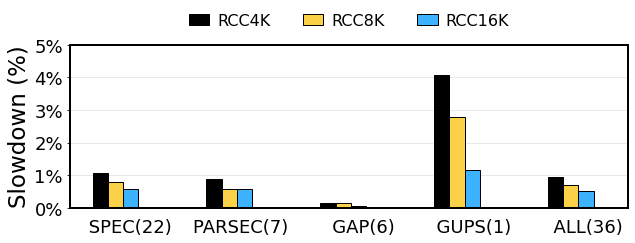

In [2]:
##Fig9: Proportional Struct Size sensitivity
import matplotlib.pyplot as plt
import csv
import numpy as np
import sys
import matplotlib.patches as mpatches
import seaborn as sns
import pandas as pd
# from plotting_lib import get_color_palette
hatches = ["", "", "", "",""]
# colors = ['#4285f4', '#ea4335', 'black', '#34a853']
# colors = ['#79A3B1','#1687A7','#276678']
#gist_rath_r
# colors = ['#F3950D', '#5da04b', '#153878','maroon','#151870']
colors = ['skyblue', '#5da04b', '#153878','maroon','#753188']
colors = ['black','#FBD148','#3DB2FF', '#34a853']

# colors = ['#0000ff','#c729d6','#ffa857']
# colors = ['#ffe817','#ff6996','#6400ff']
# legends = ["16K", "32K","64K","128K"]
legends = ["RCC4K","RCC8K","RCC16K"]
# legends = ["BR1", "BR2", "BR3","BR4"]
bench=[]
qarma=[[]]

leg_handles=[]
for i in range(0,3):
    leg_handles.append(mpatches.Patch(facecolor=colors[i], lw=1, hatch=hatches[i], label=legends[i], edgecolor='k'))

with open("perf-rcc-AR.csv",'r') as csvfile:
    i=0
    df = pd.read_csv(csvfile)
    plots = df.T
    for index, row in plots.iterrows():
        if i == 0:
            j=0
            for col in row:
                # if j == 0:
                #     j=j+1
                #     continue;
                import re

                s = col
                result = re.search('[0-9]\.(.*)_', s)
                if result is not None:
                    bench.append(result.group(1))
                else:
                    bench.append(col)
            i=i+1
            continue
        qarma.append([])
        j=0
        for col in row:
            # if j == 0:
            #     j=j+1
            #     continue
            qarma[i-1].append(float(row[j]))
            j=j+1
        i=i+1

def subcategorybar(X, vals, width=0.8):
    n = len(vals)
    n=6
    _X = np.arange(len(X))
    for i in range(3):
        b = str(i)
        a = 'core ' + b
        # print(vals[i])
        plt.bar(_X + i/float(n)*width, vals[i], edgecolor='k',color=colors[i], 
               width=width/float(n), linewidth=1, hatch=hatches[i], align="edge",label=legends[i])   
        # for index, value in enumerate(vals[i]):
        #     if (index >= 25):
        #         plt.text(index - width/2 + i/float(n)*width, 3*value, "{:.2f}%".format(value), fontsize=16, 
        #         bbox=dict(boxstyle='Round', fc='white'), rotation=30)
    plt.xticks(_X+0.2 , X)
    axes = plt.gca()
    axes.tick_params(axis="x",direction="in",pad=10)
    axes.yaxis.grid(True,color='lightgrey', linewidth=0.5)
#     axes.yaxis.grid(True,color='k',linewidth=0.2)
    axes.set_axisbelow(True)
    plt.xticks(fontsize=tick_font_s, rotation=0, ha='center')
#     ax.tick_params(axis='x', which='major', pad=15)
    loc, labels = plt.xticks()
    yarr = np.arange(0, 101, step=1)
#     ylabels = ["%0.0f%%" % x for x in yarr]
    ylabels = [("%0.0f%%" % x) if (x%1==0) else "" for x in yarr]
    plt.yticks(yarr, ylabels, fontsize=tick_font_s)
#     plt.xlim([-0.5,4.2])
    plt.xlim([-0.2,4.7])
    plt.ylim([0,5])
    plt.ylabel("Slowdown (%)",fontsize=23)
    # plt.axhline(y=1.0,label="Baseline", color='black', linestyle='dotted',ms=12.0)
    for axis in ['top','bottom','left','right']:
        axes.spines[axis].set_linewidth(2)

fig = plt.figure(figsize=(10,3))
tick_font_s=18
subcategorybar(bench, qarma[0:4])
plt.legend(handles = leg_handles,handlelength=1.3,handletextpad=0.5, bbox_to_anchor=(0.5,1.15),frameon=False,loc='center',ncol=4,prop={'size':16})
plt.savefig('perf-rcc-AR2.pdf',bbox_inches='tight')
plt.show()

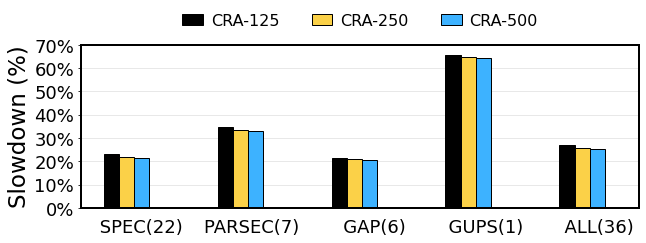

In [7]:
##Fig9: Proportional Struct Size sensitivity
import matplotlib.pyplot as plt
import csv
import numpy as np
import sys
import matplotlib.patches as mpatches
import seaborn as sns
import pandas as pd
# from plotting_lib import get_color_palette
hatches = ["", "", "", "",""]
# colors = ['#4285f4', '#ea4335', 'black', '#34a853']
# colors = ['#79A3B1','#1687A7','#276678']
#gist_rath_r
# colors = ['#F3950D', '#5da04b', '#153878','maroon','#151870']
colors = ['skyblue', '#5da04b', '#153878','maroon','#753188']
colors = ['black','#FBD148','#3DB2FF', '#34a853']

# colors = ['#0000ff','#c729d6','#ffa857']
# colors = ['#ffe817','#ff6996','#6400ff']
# legends = ["16K", "32K","64K","128K"]
legends = ["CRA-125","CRA-250","CRA-500"]
# legends = ["BR1", "BR2", "BR3","BR4"]
bench=[]
qarma=[[]]

leg_handles=[]
for i in range(0,3):
    leg_handles.append(mpatches.Patch(facecolor=colors[i], lw=1, hatch=hatches[i], label=legends[i], edgecolor='k'))

with open("sens-cra.csv",'r') as csvfile:
    i=0
    df = pd.read_csv(csvfile)
    plots = df.T
    for index, row in plots.iterrows():
        if i == 0:
            j=0
            for col in row:
                # if j == 0:
                #     j=j+1
                #     continue;
                import re

                s = col
                result = re.search('[0-9]\.(.*)_', s)
                if result is not None:
                    bench.append(result.group(1))
                else:
                    bench.append(col)
            i=i+1
            continue
        qarma.append([])
        j=0
        for col in row:
            # if j == 0:
            #     j=j+1
            #     continue
            qarma[i-1].append(float(row[j]))
            j=j+1
        i=i+1

def subcategorybar(X, vals, width=0.8):
    n = len(vals)
    n=6
    _X = np.arange(len(X))
    for i in range(3):
        b = str(i)
        a = 'core ' + b
        # print(vals[i])
        plt.bar(_X + i/float(n)*width, vals[i], edgecolor='k',color=colors[i], 
               width=width/float(n), linewidth=1, hatch=hatches[i], align="edge",label=legends[i])   
        # for index, value in enumerate(vals[i]):
        #     if (index >= 25):
        #         plt.text(index - width/2 + i/float(n)*width, 3*value, "{:.2f}%".format(value), fontsize=16, 
        #         bbox=dict(boxstyle='Round', fc='white'), rotation=30)
    plt.xticks(_X+0.2 , X)
    axes = plt.gca()
    axes.tick_params(axis="x",direction="in",pad=10)
    axes.yaxis.grid(True,color='lightgrey', linewidth=0.5)
#     axes.yaxis.grid(True,color='k',linewidth=0.2)
    axes.set_axisbelow(True)
    plt.xticks(fontsize=tick_font_s, rotation=0, ha='center')
#     ax.tick_params(axis='x', which='major', pad=15)
    loc, labels = plt.xticks()
    yarr = np.arange(0, 101, step=10)
#     ylabels = ["%0.0f%%" % x for x in yarr]
    ylabels = [("%0.0f%%" % x) if (x%10==0) else "" for x in yarr]
    plt.yticks(yarr, ylabels, fontsize=tick_font_s)
#     plt.xlim([-0.5,4.2])
    plt.xlim([-0.2,4.7])
    plt.ylim([0,70])
    plt.ylabel("Slowdown (%)",fontsize=23)
    # plt.axhline(y=1.0,label="Baseline", color='black', linestyle='dotted',ms=12.0)
    for axis in ['top','bottom','left','right']:
        axes.spines[axis].set_linewidth(2)

fig = plt.figure(figsize=(10,3))
tick_font_s=18
subcategorybar(bench, qarma[0:4])
plt.legend(handles = leg_handles,handlelength=1.3,handletextpad=0.5, bbox_to_anchor=(0.5,1.15),frameon=False,loc='center',ncol=4,prop={'size':16})
plt.savefig('sens-cra.pdf',bbox_inches='tight')
plt.show()

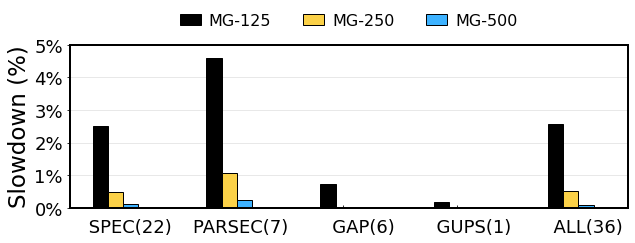

In [8]:
##Fig9: Proportional Struct Size sensitivity
import matplotlib.pyplot as plt
import csv
import numpy as np
import sys
import matplotlib.patches as mpatches
import seaborn as sns
import pandas as pd
# from plotting_lib import get_color_palette
hatches = ["", "", "", "",""]
# colors = ['#4285f4', '#ea4335', 'black', '#34a853']
# colors = ['#79A3B1','#1687A7','#276678']
#gist_rath_r
# colors = ['#F3950D', '#5da04b', '#153878','maroon','#151870']
colors = ['skyblue', '#5da04b', '#153878','maroon','#753188']
colors = ['black','#FBD148','#3DB2FF', '#34a853']

# colors = ['#0000ff','#c729d6','#ffa857']
# colors = ['#ffe817','#ff6996','#6400ff']
# legends = ["16K", "32K","64K","128K"]
legends = ["MG-125","MG-250","MG-500"]
# legends = ["BR1", "BR2", "BR3","BR4"]
bench=[]
qarma=[[]]

leg_handles=[]
for i in range(0,3):
    leg_handles.append(mpatches.Patch(facecolor=colors[i], lw=1, hatch=hatches[i], label=legends[i], edgecolor='k'))

with open("sens-mg.csv",'r') as csvfile:
    i=0
    df = pd.read_csv(csvfile)
    plots = df.T
    for index, row in plots.iterrows():
        if i == 0:
            j=0
            for col in row:
                # if j == 0:
                #     j=j+1
                #     continue;
                import re

                s = col
                result = re.search('[0-9]\.(.*)_', s)
                if result is not None:
                    bench.append(result.group(1))
                else:
                    bench.append(col)
            i=i+1
            continue
        qarma.append([])
        j=0
        for col in row:
            # if j == 0:
            #     j=j+1
            #     continue
            qarma[i-1].append(float(row[j]))
            j=j+1
        i=i+1

def subcategorybar(X, vals, width=0.8):
    n = len(vals)
    n=6
    _X = np.arange(len(X))
    for i in range(3):
        b = str(i)
        a = 'core ' + b
        # print(vals[i])
        plt.bar(_X + i/float(n)*width, vals[i], edgecolor='k',color=colors[i], 
               width=width/float(n), linewidth=1, hatch=hatches[i], align="edge",label=legends[i])   
        # for index, value in enumerate(vals[i]):
        #     if (index >= 25):
        #         plt.text(index - width/2 + i/float(n)*width, 3*value, "{:.2f}%".format(value), fontsize=16, 
        #         bbox=dict(boxstyle='Round', fc='white'), rotation=30)
    plt.xticks(_X+0.2 , X)
    axes = plt.gca()
    axes.tick_params(axis="x",direction="in",pad=10)
    axes.yaxis.grid(True,color='lightgrey', linewidth=0.5)
#     axes.yaxis.grid(True,color='k',linewidth=0.2)
    axes.set_axisbelow(True)
    plt.xticks(fontsize=tick_font_s, rotation=0, ha='center')
#     ax.tick_params(axis='x', which='major', pad=15)
    loc, labels = plt.xticks()
    yarr = np.arange(0, 101, step=1)
#     ylabels = ["%0.0f%%" % x for x in yarr]
    ylabels = [("%0.0f%%" % x) if (x%1==0) else "" for x in yarr]
    plt.yticks(yarr, ylabels, fontsize=tick_font_s)
#     plt.xlim([-0.5,4.2])
    plt.xlim([-0.2,4.7])
    plt.ylim([0,5])
    plt.ylabel("Slowdown (%)",fontsize=23)
    # plt.axhline(y=1.0,label="Baseline", color='black', linestyle='dotted',ms=12.0)
    for axis in ['top','bottom','left','right']:
        axes.spines[axis].set_linewidth(2)

fig = plt.figure(figsize=(10,3))
tick_font_s=18
subcategorybar(bench, qarma[0:4])
plt.legend(handles = leg_handles,handlelength=1.3,handletextpad=0.5, bbox_to_anchor=(0.5,1.15),frameon=False,loc='center',ncol=4,prop={'size':16})
plt.savefig('sens-mg.pdf',bbox_inches='tight')
plt.show()